In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
import time

In [3]:
armscores = np.zeros(0)
ctypes = []
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    armscores_mouse = np.zeros(calc.shape[1])
    for cell in range(calc.shape[1]):
        armscores_mouse[cell] = armscorebehav(calc[:, cell], behav)
        ctype = celltypebehav(calc[:, cell], behav)
        ctypes.append(ctype)
    armscores = np.hstack((armscores, armscores_mouse))
ctypes = np.array(ctypes)

In [4]:
for typ in ['o', 'n', 'c']:
    print(typ, np.sum(ctypes==typ))

o 199
n 435
c 223


In [5]:
d = {}
d['ctypes'] = ctypes
sio.savemat('ctypes.mat', d)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  3.,  6.,  8., 16., 13., 12., 22.,
        32., 36., 53., 48., 63., 68., 58., 61., 58., 56., 44., 32., 27.,
        31., 20., 16., 19., 16., 18.,  6.,  6.,  2.,  4.,  1.,  1.,  1.,
         0.]),
 array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
        -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
        -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
         0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
         0.8 ,  0.85,  0.9 ,  0.95,  1.  ]),
 <BarContainer object of 40 artists>)

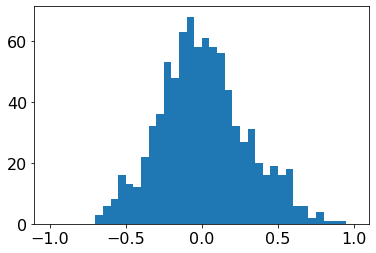

In [6]:
plt.hist(armscores, bins = np.linspace(-1, 1, 41))

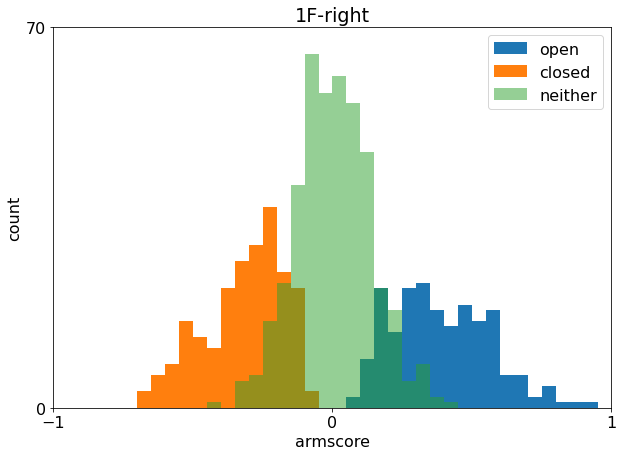

In [12]:
plt.figure(figsize=(10, 7))
for typ in ['o', 'c', 'n']:
    if typ == 'n':
        alpha = 0.5
    else:
        alpha = 1
    plt.hist(armscores[ctypes == typ], bins = np.linspace(-1, 1, 41), alpha = alpha, density=False)
plt.xticks(np.linspace(-1, 1, 11))
plt.legend(['open', 'closed', 'neither'])
plt.xlabel('armscore')
plt.ylabel('count')
plt.ylim(0, 70)
plt.yticks([0, 70])
plt.xlim(-1, 1)
plt.xticks([-1, 0, 1])
plt.title('1F-right')
plt.savefig('./elife_figs/1F_right.svg')

In [11]:
#bootstrapping

In [12]:
t0 = time.time()
bootarmscores = np.zeros(0)
numTrials = 100
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    for trial in range(numTrials):
        bootarmscores_mouse = np.zeros(calc.shape[1])
        for cell in range(calc.shape[1]):
            bootarmscores_mouse[cell] = armscorebehav(calc[:, cell], behav, bootstrap=True)
        bootarmscores = np.hstack((bootarmscores, bootarmscores_mouse))
    print(mouse, time.time() - t0)

230 321.1729097366333
355 578.0825073719025
358 872.6549601554871
362 1149.5654237270355
673 1266.336574792862
674 1335.1543226242065
816 1628.7310721874237
825 1907.704895734787


In [13]:
bootarmscores.size

85700

In [ ]:
d = {}
d['realarmscores'] = armscores
d['bootarmscores'] = bootarmscores
sio.savemat('armscoresboot.mat', d)

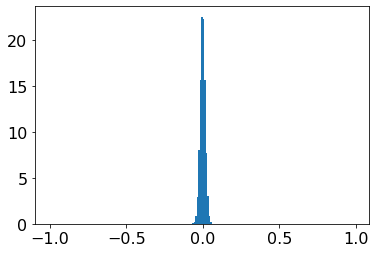

In [17]:
boothistfine = plt.hist(bootarmscores, density = True, bins = np.arange(-1, 1, 0.01))

In [20]:
bins = np.linspace(-1, 1, 41)

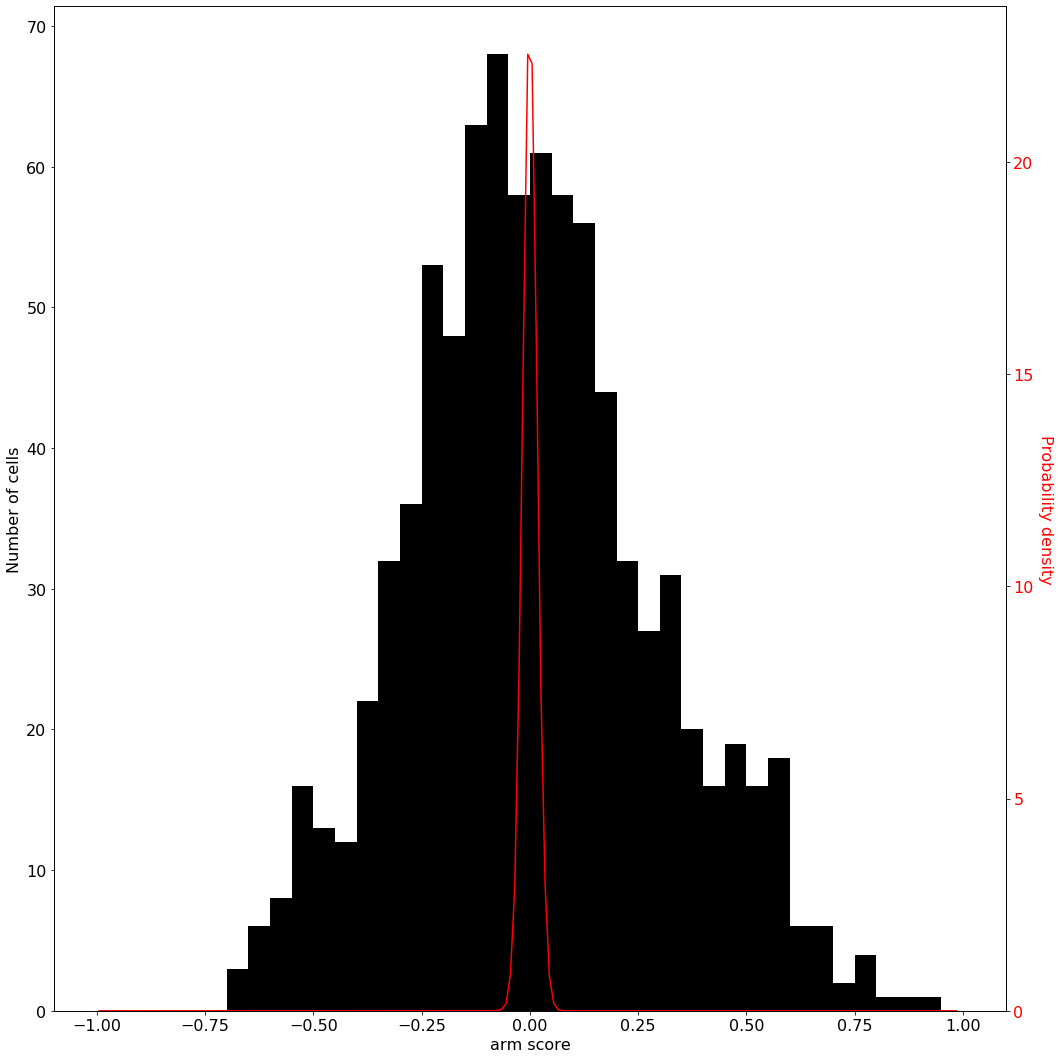

In [22]:
plt.figure(figsize=(15, 15))
realhist = plt.hist(armscores, bins = bins, color = 'k')
ax = plt.gca()
ax.set_ylabel('Number of cells')
ax.set_xlabel('arm score')
#ax.set_xlim(-1, 1)
ax2 = ax.twinx()
ax2.plot(boothistfine[1][:-1] + 0.005, boothistfine[0], 'r')
ax2.set_ylabel('Probability density', rotation = -90, va = 'bottom', color = 'r')
ax2.tick_params(axis = 'y', labelcolor = 'r')
ax2.set_ylim(0, ax2.get_ylim()[1])
plt.tight_layout()

In [129]:
d = {}
d['armscores'] = armscores
d['ctypes'] = ctypes
sio.savemat('armscores.mat', d)